In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#carregar os dados
data = pd.read_csv('fort_283_2008_2022.txt', delimiter='\t', header=None)

In [3]:
# Renomear as colunas
data.columns = ['dt', 'hr', 'alt']

In [4]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [5]:
# Converter a coluna 'dt_hrs' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

In [6]:
# Calcula a média da coluna 'mare'
media_mare = 5.850

# Subtrai a média de todos os valores na coluna 'mare' e adiciona como uma nova coluna
data['alt_zero'] = data['alt'] - media_mare

# Exibe os primeiros valores do DataFrame com as colunas originais e a 'mare' centralizada
print(data[['dt', 'hr', 'alt', 'alt_zero',]])

                             dt     hr    alt  alt_zero
dt_hr                                                  
2008-04-18 02:00:00  18/04/2008  02:00  7.188     1.338
2008-04-18 03:00:00  18/04/2008  03:00  7.409     1.559
2008-04-18 04:00:00  18/04/2008  04:00  7.351     1.501
2008-04-18 05:00:00  18/04/2008  05:00  7.033     1.183
2008-04-18 06:00:00  18/04/2008  06:00  6.538     0.688
...                         ...    ...    ...       ...
2022-12-31 19:00:00  31/12/2022  19:00  5.709    -0.141
2022-12-31 20:00:00  31/12/2022  20:00  5.941     0.091
2022-12-31 21:00:00  31/12/2022  21:00  6.277     0.427
2022-12-31 22:00:00  31/12/2022  22:00  6.597     0.747
2022-12-31 23:00:00  31/12/2022  23:00  6.900     1.050

[128902 rows x 4 columns]


In [7]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['data_hora'] = data['dt'] + ' ' + data['hr']

data['data_hora'] = pd.to_datetime(data['data_hora'], format='%d/%m/%Y %H:%M')

# Exibindo o DataFrame atualizado
print(data)

                             dt     hr    alt  alt_zero           data_hora
dt_hr                                                                      
2008-04-18 02:00:00  18/04/2008  02:00  7.188     1.338 2008-04-18 02:00:00
2008-04-18 03:00:00  18/04/2008  03:00  7.409     1.559 2008-04-18 03:00:00
2008-04-18 04:00:00  18/04/2008  04:00  7.351     1.501 2008-04-18 04:00:00
2008-04-18 05:00:00  18/04/2008  05:00  7.033     1.183 2008-04-18 05:00:00
2008-04-18 06:00:00  18/04/2008  06:00  6.538     0.688 2008-04-18 06:00:00
...                         ...    ...    ...       ...                 ...
2022-12-31 19:00:00  31/12/2022  19:00  5.709    -0.141 2022-12-31 19:00:00
2022-12-31 20:00:00  31/12/2022  20:00  5.941     0.091 2022-12-31 20:00:00
2022-12-31 21:00:00  31/12/2022  21:00  6.277     0.427 2022-12-31 21:00:00
2022-12-31 22:00:00  31/12/2022  22:00  6.597     0.747 2022-12-31 22:00:00
2022-12-31 23:00:00  31/12/2022  23:00  6.900     1.050 2022-12-31 23:00:00

[128902 row

In [8]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('data_hora', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['alt_zero'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

data_hora
2008-04-30    0.465106
2008-05-31    0.465298
2008-06-30    0.443228
2008-07-31    0.458044
2008-08-31    0.471140
                ...   
2022-08-31    0.525081
2022-09-30    0.526935
2022-10-31    0.524597
2022-11-30    0.535733
2022-12-31    0.499542
Freq: ME, Name: alt_zero, Length: 177, dtype: float64


C:\Users\labdi\AppData\Local\Temp\ipykernel_14592\225851342.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = data['alt_zero'].resample('M').mean()


In [9]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df = pd.DataFrame({
    'data_hora': media_mensal.index,
    'alt_zero': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df)

     data_hora  alt_zero
0   2008-04-30  0.465106
1   2008-05-31  0.465298
2   2008-06-30  0.443228
3   2008-07-31  0.458044
4   2008-08-31  0.471140
..         ...       ...
172 2022-08-31  0.525081
173 2022-09-30  0.526935
174 2022-10-31  0.524597
175 2022-11-30  0.535733
176 2022-12-31  0.499542

[177 rows x 2 columns]


In [10]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df)), df['data_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

In [11]:
# Calcular a média móvel de 12 períodos com janelas centradas
df['Media_Movel_12'] = df['alt_zero'].rolling(window=12, center=True).sum()

In [12]:
df['Media_Movel_2_Centrada'] = df['Media_Movel_12'].rolling(window=2, center=True).sum()

In [13]:
# Calculando a média móvel centrada dividida por 24
df['Media_Movel_Centrada'] = df['Media_Movel_2_Centrada'] / 24

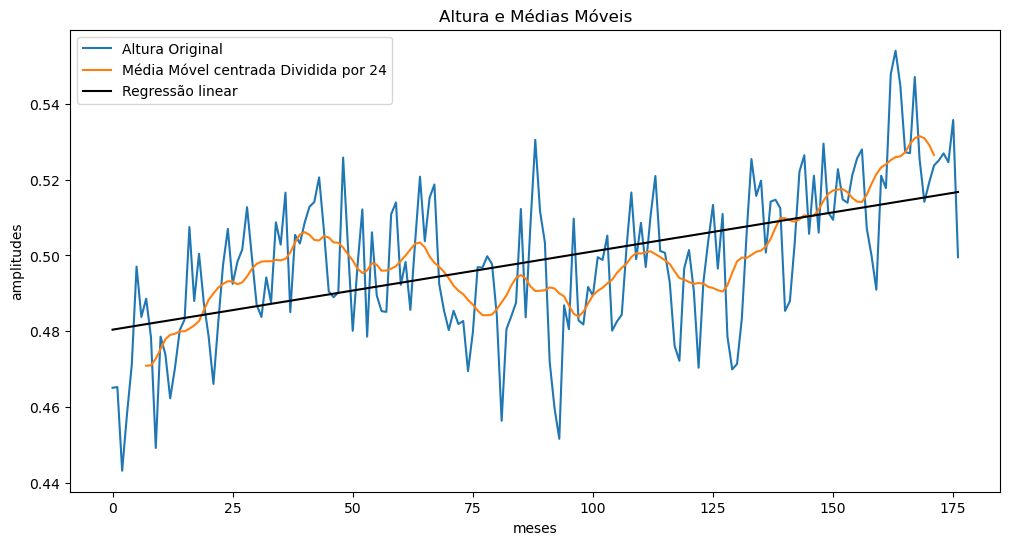

In [14]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df['alt_zero'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [15]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
df['indices_sazonais'] = df['alt_zero'] - df['Media_Movel_Centrada']

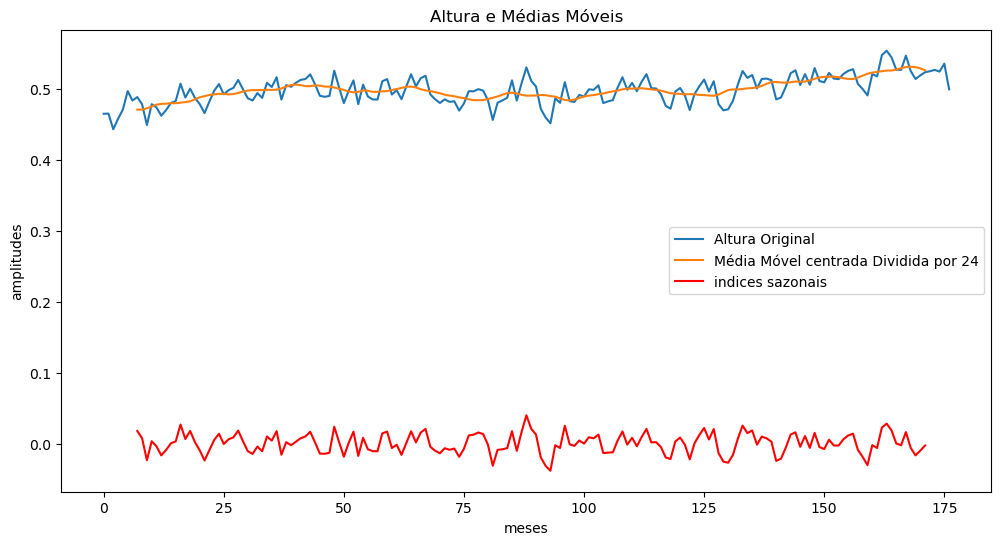

In [16]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(df['alt_zero'], label='Altura Original')


plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(df['indices_sazonais'], 'r', label='indices sazonais')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [17]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = df['data_hora'].dt.month

In [18]:
#adicionar acoluna de meses no Dataframe como 'mensal'
df['mensal'] = df['data_hora'].dt.month

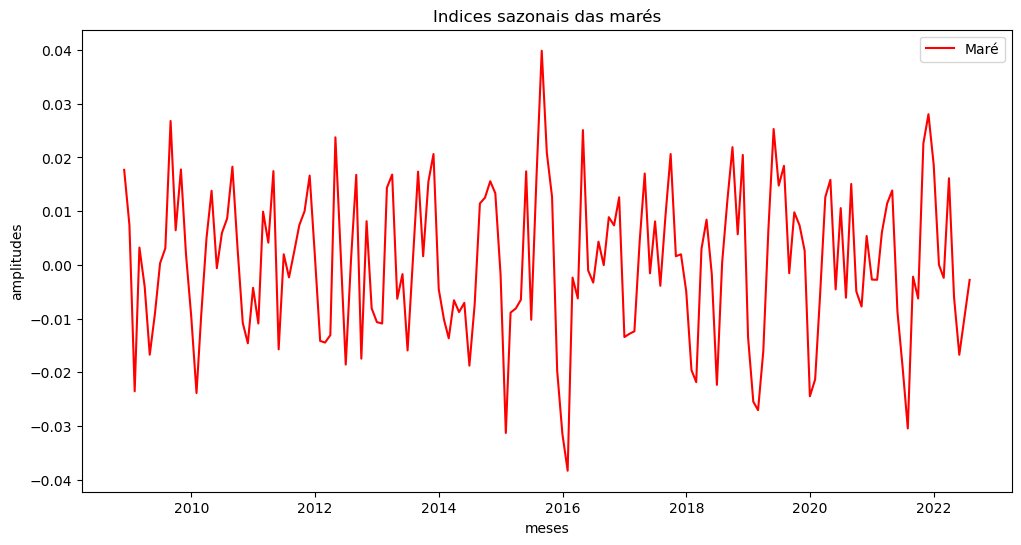

In [19]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [20]:
#liste de nomes dos meses 
meses = ['dezembro','janeiro', 'fevereiro','março',
         'abril', 'maio','junho', 'julho',
         'agosto', 'setembro', 'outubro',
         'novembro']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = df[df['data_hora'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()

In [21]:
medias_ind_sazonal

{'dezembro': -0.01752060207770478,
 'janeiro': -0.006039437718653768,
 'fevereiro': 0.001376782554911697,
 'março': 0.0069578358756575975,
 'abril': -0.0016943669864627078,
 'maio': -0.005453737798390891,
 'junho': -7.892730973251589e-06,
 'julho': 0.012747653062995643,
 'agosto': 0.0065101342002499545,
 'setembro': 0.008131482858871783,
 'outubro': 0.007072544817029831,
 'novembro': -0.006711105469921862}

In [22]:
#criar um novo dataframe para e transfromar o dicionario em conjuntos

# Criando o DataFrame
df1 = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df1

,mes_nome,media_indice_sazonal
0,dezembro,-0.017521
1,janeiro,-0.006039
2,fevereiro,0.001377
3,março,0.006958
4,abril,-0.001694
5,maio,-0.005454
6,junho,-0.000008
7,julho,0.012748
8,agosto,0.006510
9,setembro,0.008131


In [23]:
#Fazendo a soma, para que dei 0 segundo a definição do modelo adetivo o somatorio das média dos indices sazonais tem que ser igual a zero
soma_md_indices = sum(df1['media_indice_sazonal'])

In [24]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.00044744088230077027

In [25]:
#indices corrigidos
df1['media_indice_corrigido'] = df1['media_indice_sazonal'] - excesso
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,dezembro,-0.017521,-0.017968
1,janeiro,-0.006039,-0.006487
2,fevereiro,0.001377,0.000929
3,março,0.006958,0.006510
4,abril,-0.001694,-0.002142
5,maio,-0.005454,-0.005901
6,junho,-0.000008,-0.000455
7,julho,0.012748,0.012300
8,agosto,0.006510,0.006063
9,setembro,0.008131,0.007684


In [26]:
#df1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_Fortaleza.csv', index=False)

In [27]:
sum(df1['media_indice_corrigido'])

1.734723475976807e-18

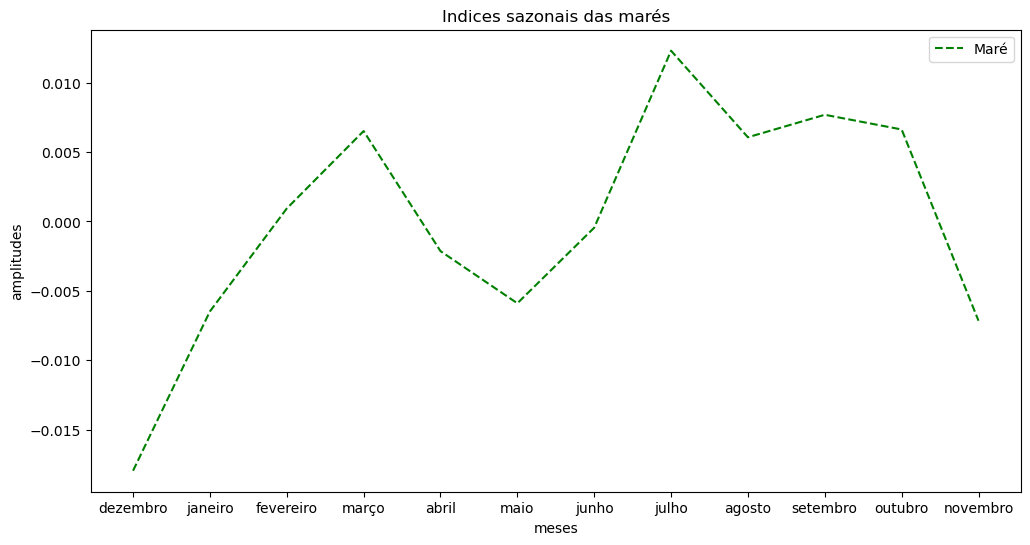

In [28]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['mes_nome'], df1['media_indice_corrigido'], linestyle='--', color='g', label='Maré') 
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [29]:
# Supondo que 'data' seja o nome do seu DataFrame
df['data_hora'] = pd.to_datetime(df['data_hora'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
df['anomes'] = df['data_hora'].dt.strftime('%Y-%m')


In [30]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}

# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df1['mes'] = df1['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df1 = df1.sort_values(by='mes')

In [31]:
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido,mes
1,janeiro,-0.006039,-0.006487,1
2,fevereiro,0.001377,0.000929,2
3,março,0.006958,0.006510,3
4,abril,-0.001694,-0.002142,4
5,maio,-0.005454,-0.005901,5
6,junho,-0.000008,-0.000455,6
7,julho,0.012748,0.012300,7
8,agosto,0.006510,0.006063,8
9,setembro,0.008131,0.007684,9
10,outubro,0.007073,0.006625,10


In [32]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
df['indices_sazonais'] = df['mensal'].map(df1.set_index('mes')['media_indice_corrigido'])

In [33]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/variação_interna_Fortaleza.csv', index=False)